In [1]:
# standard libraries
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append("..")
import helper.helper as h
import helper.methods as m

from importlib import reload  # Python 3.4+

In [128]:
# # # reload helper and methods for when things change
# # reload(m);
# # reload(h);
# # reload(matplotlib);
# # reload(plt);

# matplotlib.rcParams['backend'] = "qt5agg"

# matplotlib.rcParams.update({
#     'font.family': 'DejaVu Sans',
#     'text.usetex': False,
#     'pgf.rcfonts': False,
#     'font.size': 12
# })

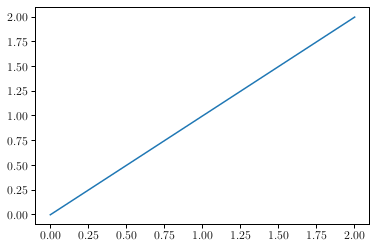

In [129]:
plt.plot(range(3))

In [2]:
def gen_var(W, T):
    p = np.shape(W)[0]
    noises = np.zeros((2 * T, p))
    
    X = np.zeros((2 * T, p))
    X[0] = np.random.multivariate_normal(np.zeros(p), np.identity(p))
    
    noises[1:] = np.random.multivariate_normal(np.zeros(p), np.identity(p), 2 * T - 1)
    
    for t in range(1, 2 * T):
        X[t] = X[t - 1] @ W + noises[t]
        
    return X[T:]

def gen_var_noises(W, T, noises):
    p = np.shape(W)[0]
    
    X = np.zeros((T, p))
    X[0] = noises[0]
    
    for t in range(1, T):
        X[t] = X[t - 1] @ W + noises[t]

    return X

def gen_var_noises_stat(W, T, noises):
    p = np.shape(W)[0]
    
    X = np.zeros((T, p))
    X[0] = noises[0]
    
    for t in range(1, T):
        X[t] = X[t - 1] @ W + noises[t]

    return X[T // 2:]

In [3]:
print(np.shape(gen_var_noises_stat(W_true, 100, np.random.uniform(0, 1, 100))))

NameError: name 'W_true' is not defined

True W:
[[ 0.8  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0. ]
 [-0.5  0.8  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0. ]
 [ 0.5  0.   0.8  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0. ]
 [ 0.  -0.5  0.5  0.8  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0. ]
 [-0.5  0.   0.   0.5  0.8  0.   0.   0.   0.   0.   0.   0.   0.   0.
   0. ]
 [ 0.5  0.5  0.   0.   0.   0.8  0.   0.   0.   0.   0.   0.   0.   0.
   0. ]
 [ 0.   0.   0.   0.   0.5  0.5  0.8  0.   0.   0.   0.   0.   0.   0.
   0. ]
 [ 0.  -0.5  0.5  0.5  0.5  0.5  0.   0.8  0.   0.   0.   0.   0.   0.
   0. ]
 [-0.5  0.   0.5  0.5  0.   0.   0.   0.   0.8  0.   0.   0.   0.   0.
   0. ]
 [ 0.   0.   0.5  0.   0.5  0.   0.  -0.5 -0.5  0.8  0.   0.   0.   0.
   0. ]
 [ 0.5  0.   0.5  0.5  0.5  0.   0.   0.5  0.   0.   0.8  0.   0.   0.
   0. ]
 [ 0.  -0.5  0.5  0.   0.   0.   0.5  0.5  0.  -0.5 -0.5  0.8  0.   0.
   0. ]
 [-0.5 -0.5  0.   0.   0.5  0.  -0.5  0.   0

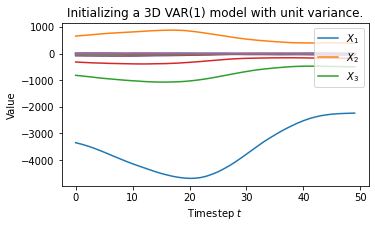

In [5]:
# import matplotlib

# matplotlib.use("pgf")
# matplotlib.rcParams.update({
#     "pgf.texsystem": "pdflatex",
#     'font.family': 'serif',
#     'text.usetex': True,
#     'pgf.rcfonts': False,
#     'font.size': 8
# })

# matplotlib.rcParams['axes.unicode_minus'] = False

np.random.seed(seed = 12345)

# Number of dimensions, number of edges, number of samples
T, p, s = 50, 15, 50

N = int(p * (p + 1) / 2)

### Coefficient matrix
## First approach: A is a DAG, no model mismatch
A_true = h.generate_A(p, s, tril = True, low = 0.50, high = 0.50)

# set coefficients to be positive (else oscillating which does not make sense)
for i in range(len(A_true)):
    A_true[i][i] = 0.80 # np.abs(A_true[i][i])

s = len(A_true.flatten().nonzero()[0])

## True permutation
P_true = np.identity(p) # np.random.permutation(np.identity(n))

## Datagenerating W
W_true = P_true.T @ A_true @ P_true
print(f"True W:\n{np.round(W_true, 2)}.\n")

## Generate series
X = gen_var(W_true, T)

## Plot series
fig = plt.figure(figsize = (5.5, 3))
plt.title("Initializing a 3D VAR(1) model with unit variance.")
fig.patch.set_alpha(0)
plt.xlabel(r"Timestep $t$")
plt.ylabel(r"Value")
plots = plt.plot(X); 
plt.legend(plots, [r"$X_1$", r"$X_2$", r"$X_3$"], loc = 1);
# plt.savefig('figure bootstrap stationary.pgf')

In [4]:
p, s, T = 4, 15, 250
W_true = np.array([
    [0.85, 0.0, 0.0, 0.0], 
    [0.00, 0.85, 0.00, 0.00], 
    [-0.38, 0.36, 0.85, 0.00],
    [0.46, 0.00, 0.00, 0.85]])

## Generate series
X = gen_var(W_true, T)

In [3]:
covariance_X = np.matmul(np.linalg.inv(np.identity(p ** 2) - np.kron(W_true.T, W_true.T)), np.identity(p).reshape(p ** 2)).reshape((p, p))

def expected_cost_var(W_true, W_est, Sigma = np.identity(p)):
    
    # base on the distribution of X, no actual data needed.    
    # covariance_X = np.matmul(np.linalg.inv(np.identity(p ** 2) - np.kron(W_true.T, W_true.T)), Sigma.reshape(p ** 2)).reshape((p, p))
    
    # covariance matrix
    covariance_matrix = Sigma + np.matmul((W_true - W_est).T, np.matmul(covariance_X.T, (W_true - W_est)))
    
    # return expected MSE
    return np.trace(covariance_matrix)

NameError: name 'p' is not defined

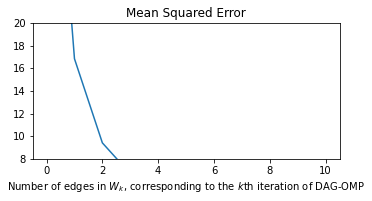

In [7]:
W, Ws, mses, max_gains = m._OMP_2(X[:-1], X[1:], output = True)

fig = plt.figure(figsize = (5.5, 2.5))
l_lim = 0
plt.ylim(8, 20)
plt.title("Mean Squared Error")
plt.xlabel(r"Number of edges in $W_k$, corresponding to the $k$th iteration of DAG-OMP")
# plt.vlines(s, min((mses)) - 0.2, max((mses[l_lim:])), linestyle = '--')
plt.plot(range(l_lim, len(Ws) + 1), (mses[l_lim:]))
plt.savefig('figure bootstrap ten mse 2.pgf')
plt.show()

# plt.title("Log Mean Squared Error")
# plt.xlabel("Edges Remaining (Order by Importance)")
# plt.vlines(s, min(np.log10(mses)) - 0.2, max(np.log10(mses)), linestyle = '--')
# plt.plot(range(0, N + 1), np.log10(mses))
# plt.show()

# mses_diff = np.array(mses[:-1]) - np.array(mses[1:])
# plt.ylim(-0.1, 5)
# plt.title("Decrease in Mean Squared Error")
# plt.xlabel(r"$Number of edges in $W_k$, corresponding to the $k$th iteration of DAG-OMP")
# plt.vlines(s, min(mses_diff), max(mses_diff), linestyle = '--')
# plt.plot(range(1, N + 1), mses_diff)
# plt.show()

# plt.title("Decrease in Maximum Correlation")
# plt.xlabel("Edges Remaining (Order by Importance)")
# plt.vlines(s, min(max_gains) - 0.2, max(max_gains), linestyle = '--')
# plt.plot(range(1, N + 1), max_gains)
# plt.show()

In [4]:
def get_residuals(X, W):
    return X[1:] - X[:-1] @ W

def center_residuals(residuals):
    return residuals - np.mean(residuals, axis = 0)

def sample_residuals(residuals, n):
    sampled_residuals = np.zeros((n, np.shape(residuals)[1]))
    
    for i, r in enumerate(residuals.T):
        sampled_residuals[:, i] = np.random.choice(r, n)
    
    return sampled_residuals

W^(1):
[[0.97 0.   0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]].

\hat(W)^(1):
[[0.99 0.   0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]].

W^(2):
[[0.97 0.   0.   0.  ]
 [0.   0.92 0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]].

\hat(W)^(2):
[[0.95 0.   0.   0.  ]
 [0.   0.92 0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]].

W^(3):
[[0.97 0.   0.   0.  ]
 [0.   0.92 0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   0.   0.85]].

\hat(W)^(3):
[[0.95 0.   0.   0.  ]
 [0.   0.94 0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   0.   0.8 ]].

W^(4):
[[0.97 0.   0.   0.  ]
 [0.   0.92 0.   0.  ]
 [0.   0.   0.78 0.  ]
 [0.   0.   0.   0.85]].

\hat(W)^(4):
[[0.97 0.   0.   0.  ]
 [0.   0.89 0.   0.  ]
 [0.   0.   0.76 0.  ]
 [0.   0.   0.   0.87]].

W^(5):
[[0.91 0.   0.   0.  ]
 [0.   0.92 0.   0.  ]
 [0.   0.   0.78 0.  ]
 [0.38 0.   0.   0.85]].

\hat(W)^(5):
[[0.92 0.   0.   0.  ]
 [0.   0.93 0.   0.  ]

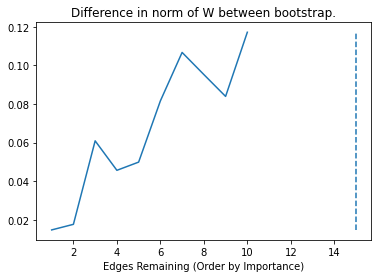

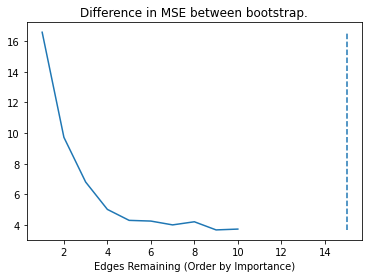

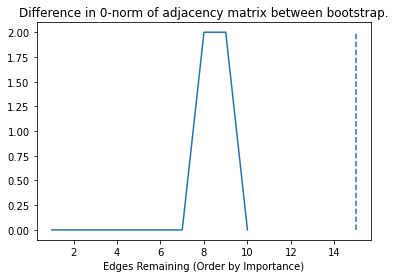

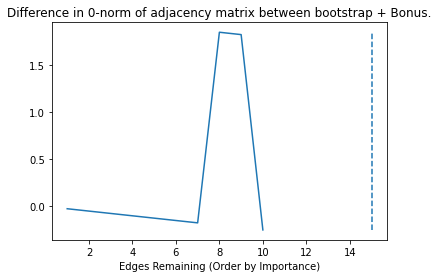

In [11]:
N = len(Ws)
bootstrap_Ws = []
bootstrap_mses = []
diff = []
diff_bin = []

for i, W in enumerate(Ws):
    res = center_residuals(get_residuals(X, W))
    
    # generate data according to W
    X_W = gen_var_noises(W, T, sample_residuals(res, T))
    
    # bootstrap, get \hat{W}_k
    bootstrap_Ws_i, _ = m._K_OMP(X_W[:-1], X_W[1:], max_coefs = i + 1, normalize = True, F = [])
    bootstrap_W_ii = bootstrap_Ws_i
    
    print(f"W^({i+1}):\n{np.round(W, 2)}.\n")
    print(f"\hat(W)^({i+1}):\n{np.round(bootstrap_W_ii, 2)}.\n")
    
    # compare OMP and Bootstrap
    bootstrap_mses.append(h.MSE(bootstrap_W_ii, X_W))
    
    # check difference between the two
    diff.append(np.linalg.norm(bootstrap_W_ii - W))
    
    # binary difference
    W_bin = W != 0
    W_bootstrap_bin = bootstrap_W_ii != 0
    diff_bin.append(np.linalg.norm((W_bin ^ W_bootstrap_bin).flatten(), 0))
    

diff_bin_mod = diff_bin.copy()
diff_bin_mod -= 0.025 * (np.array(range(1, N + 1)) - diff_bin_mod)

plt.title("Difference in norm of W between bootstrap.")
plt.xlabel("Edges Remaining (Order by Importance)")
plt.vlines(s, min(diff), max(diff), linestyle = '--')
plt.plot(range(1, N + 1), diff)
plt.show()
plt.title("Difference in MSE between bootstrap.")
plt.xlabel("Edges Remaining (Order by Importance)")
plt.vlines(s, min(bootstrap_mses), max(bootstrap_mses), linestyle = '--')
plt.plot(range(1, N + 1), bootstrap_mses)
plt.show()
plt.title("Difference in 0-norm of adjacency matrix between bootstrap.")
plt.xlabel("Edges Remaining (Order by Importance)")
plt.vlines(s, min(diff_bin), max(diff_bin), linestyle = '--')
plt.plot(range(1, N + 1), diff_bin)
plt.show()
plt.title("Difference in 0-norm of adjacency matrix between bootstrap + Bonus.")
plt.xlabel("Edges Remaining (Order by Importance)")
plt.vlines(s, min(diff_bin_mod), max(diff_bin_mod), linestyle = '--')
plt.plot(range(1, len(Ws) + 1), diff_bin_mod)

In [12]:
def bootstrap_rec(X, samples = 100, verbose = True):

    W, Ws, _ = m._K_OMP_output(X[:-1], X[1:], output = True, normalize = True, F = [])
    diff_bin_avg = []
    diff_bin_cov = []

    for i, W in enumerate(Ws):
        if verbose: print(i, end = ", ")
    
        diff_bin = []
        res = center_residuals(get_residuals(X, W))
    
        for j in range(samples):
            # generate data according to W
            X_W = gen_var_noises_stat(W, 2 * T, sample_residuals(res, 2 * T))
        
            # bootstrap, get \hat{W}_k
            bootstrap_W_i, _ = m._K_OMP(X_W[:-1], X_W[1:], max_coefs = i + 1, output = True, F = [], normalize = True)
    
            # difference
            W_bin = W != 0
            W_bootstrap_bin = bootstrap_W_i != 0
        
            diff_bin.append(np.linalg.norm((W_bin ^ W_bootstrap_bin).flatten(), 0))
    
        diff_bin_cov.append(np.cov(diff_bin))
        diff_bin_avg.append(np.sum(diff_bin) / np.shape(diff_bin)[0])
    
        if verbose: print(round(diff_bin_avg[i], 1), end = "\t")
            
    return diff_bin_avg, diff_bin_cov

diff_bin_avg = bootstrap_rec(X, verbose = True)
plt.vlines(s, min(diff_bin_avg), max(diff_bin_avg) / 2, linestyle = '--')
fig = plt.figure(figsize = (5.5, 2.25))
plt.xlabel("Number of edges in $W_k$.")
plt.title("Average number of edges not recovered after bootstrapping.")
plt.plot(range(1, len(diff_bin_avg) + 1), np.array(diff_bin_avg) / 2)
# plt.savefig('figure bootstrap ten example recovery.pgf')

0, 0.0	1, 0.0	2, 0.0	3, 0.0	4, 0.0	5, 0.0	6, 0.0	7, 0.0	8, 0.0	9, 0.0	10, 0.1	11, 0.0	12, 0.0	13, 0.1	14, 

KeyboardInterrupt: 

In [37]:
import matplotlib

matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
    'font.size': 8
})

matplotlib.rcParams['axes.unicode_minus'] = False

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.4, 2.42, 2.2] [0.   0.   0.   0.   0.   0.   0.   0.   1.4  2.42 2.2 ]


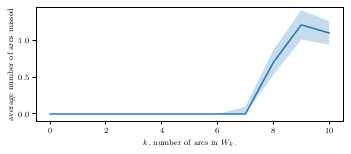

In [72]:
# plt.vlines(s, min(diff_bin_avg), max(diff_bin_avg) / 2, linestyle = '--')
fig = plt.figure(figsize = (5.5, 2.1))
plt.locator_params(axis='y', nbins=6)
plt.xlabel("$k$, number of arcs in $W_k$.")
plt.ylabel("average number of arcs missed")
q = np.append(0, diff_bin_avg)
print(diff_bin_avg, q)
plt.plot(range(0, len(q)), np.array(q) / 2)


#for l in np.array(diff_bin_avg).T:
l = np.array([0, 0, 0, 0, 0, 0, 0, 0.1, 0.17, 0.2, 0.16])
plt.fill_between(range(0, len(q)), np.array(q)/2 + l, np.maximum(np.zeros(N+1), np.array(q)/2 - l), alpha = 0.25)
plt.ylim(-0.1, 1.45);
plt.savefig('bootstrap_recovery.pgf', bbox_inches = 'tight')

[[ 0.6    0.     0.     0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.6    0.     0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.6    0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.722  0.     0.6    0.     0.     0.     0.     0.     0.   ]
 [-0.723  0.623  0.     0.     0.6    0.     0.     0.     0.     0.   ]
 [ 0.     0.757  0.     0.     0.     0.6    0.     0.     0.     0.   ]
 [ 0.     0.     0.55   0.     0.     0.     0.6    0.     0.     0.   ]
 [ 0.462  0.     0.517 -0.42   0.     0.     0.     0.6    0.     0.   ]
 [-0.769  0.     0.     0.736  0.     0.    -0.559  0.651  0.6    0.   ]
 [-0.763  0.    -0.411  0.772  0.     0.     0.     0.     0.     0.6  ]]


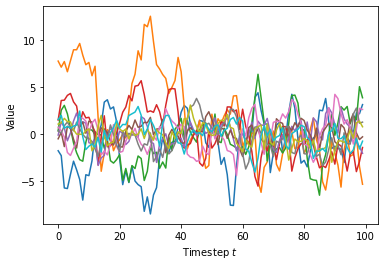

In [6]:
np.random.seed(seed = 12345)

# Number of dimensions, number of edges, number of samples
T, p, s = 100, 10, 15
N = int(p * (p + 1) / 2)

### Coefficient matrix
W_true = h.generate_A(p, s, tril = True, low = 0.4, high = 0.80)

for i in range(p):
    W_true[i][i] = 0.6 # np.abs(A_true[i][i])

s = len(W_true.flatten().nonzero()[0])

## Generate series
X = gen_var(W_true, 2 * T)[T:]
print(np.round(W_true, 3))
## Plot series
plt.xlabel(r"Timestep $t$")
plt.ylabel(r"Value")
plots = plt.plot(X); 

# ## Plot series
# fig = plt.figure(figsize = (5.5, 3))
# fig.patch.set_alpha(0)
# plt.xlabel(r"Timestep $t$")
# plt.ylabel(r"Value")
# plots = plt.plot(X); 
# plt.legend(plots, [r"$X_1$", r"$X_2$", r"$X_3$"], loc = 1);
# plt.savefig('figure exhaustive example.pgf')

In [66]:
import matplotlib
matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
    'font.size': 8
})
matplotlib.rcParams['axes.unicode_minus'] = False

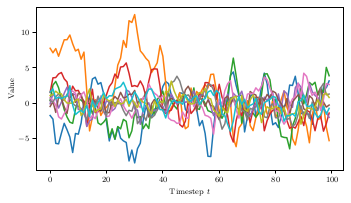

In [67]:
## Plot series
fig = plt.figure(figsize = (5.5, 3))
fig.patch.set_alpha(0)
plt.xlabel(r"Timestep $t$")
plt.ylabel(r"Value")
plt.plot(X); 
plt.savefig('figure bootstrap ten example.pgf')

In [7]:
W, Ws, mses, max_gains = m._OMP_2(X[:-1], X[1:], output = True)
res = center_residuals(get_residuals(X, W))

samples = 1000

W_bootstraps = []

for i in range(samples):
    print(i, end = ", ")
    diff = []

    # generate data according to W
    X_W = gen_var_noises(W, T, sample_residuals(res, T))

    # bootstrap, get \hat{W}_k
    bootstrap_W_i, _ = m._K_OMP(X_W[:-1], X_W[1:], output = True, F = [], normalize = True)
    W_bootstraps.append(bootstrap_W_i)

0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 

In [8]:
W_bootstraps = np.array(W_bootstraps)
print(np.shape(W_bootstraps))

def get_ci(W, W_bootstraps, a = 5):
    true_coefs = np.zeros((p, p))
    for i in range(p):
        for j in range(p):
            if not (np.percentile(W_bootstraps[:, i, j], a / 2) <= 0 and np.percentile(W_bootstraps[:, i, j], 100 - a / 2) >= 0):
                true_coefs[i][j] = 1
    return W * true_coefs


W_thresh = get_ci(W, W_bootstraps, 5)
h.score(X, m._constrained_OLS(X, W_thresh != 0), W_true);
print()
h.score(X, m._constrained_OLS(X, Ws[23] != 0), W_true);
print()
h.score(X, m._constrained_OLS(X, m._constrained_lasso(X, W != 0, alpha = 0.04) != 0), W_true);
# W_thresh_ols = m._constrained_OLS(X, W_thresh != 0)
# print(W_thresh_ols)
# h.score(X, W_thresh_ols, W_true);

(1000, 10, 10)
True Positive Rate: 1.0.
True Negative Rate: 1.0.
False Prediction Rate: 0.0
Accuracy: 1.0.
R-Squared: 0.829
Mean Squared Error: 10.16

True Positive Rate: 0.96.
True Negative Rate: 1.0.
False Prediction Rate: 0.0
Accuracy: 0.99.
R-Squared: 0.827
Mean Squared Error: 10.29

True Positive Rate: 0.96.
True Negative Rate: 0.947.
False Prediction Rate: 0.143
Accuracy: 0.95.
R-Squared: 0.828
Mean Squared Error: 10.241


In [672]:
a = 10
W_L, W_U = np.zeros((p, p)), np.zeros((p, p))

for i in range(p):
    for j in range(p):
        W_L[i][j] = np.percentile(W_bootstraps[:, i, j], a / 2)
        W_U[i][j] = np.percentile(W_bootstraps[:, i, j], 100 - a / 2)
        
print(W_L)
print(W_U)

[[ 0.81537623 -0.02508628  0.          0.        ]
 [-0.07862212  0.8449427   0.         -0.0433471 ]
 [-0.35468106  0.14049629  0.83612008 -0.05096913]
 [ 0.42862014 -0.06261465 -0.05695879  0.75372104]]
[[ 0.87672644  0.01511428  0.          0.        ]
 [ 0.          0.92409678  0.          0.01962441]
 [-0.22763267  0.25772925  0.93232724  0.06078199]
 [ 0.58649773  0.07115094  0.06050918  0.87602713]]


In [ ]:
print(Ws[s])

In [573]:
high = 25
a_list = np.linspace(0, high, high + 1)
print([(a, np.sum((W_true != 0).flatten() ^ (get_ci(W, W_bootstraps, a) != 0).flatten())) for a in a_list])

[(0.0, 5), (1.0, 6), (2.0, 6), (3.0, 6), (4.0, 6), (5.0, 6), (6.0, 6), (7.0, 6), (8.0, 6), (9.0, 6), (10.0, 6), (11.0, 6), (12.0, 6), (13.0, 6), (14.0, 6), (15.0, 7), (16.0, 8), (17.0, 10), (18.0, 11), (19.0, 11), (20.0, 11), (21.0, 12), (22.0, 12), (23.0, 12), (24.0, 13), (25.0, 14)]


In [755]:
W_c_ols = m._constrained_OLS(X, m._constrained_lasso(X, W != 0) != 0)
h.score(X, m._constrained_OLS(X, m._constrained_lasso(X, W != 0, alpha = 0.01) != 0), W_true);

True Positive Rate: 1.0.
True Negative Rate: 0.846.
False Prediction Rate: 0.222
Accuracy: 0.9.
R-Squared: 0.939
Mean Squared Error: 7.899


0	1	2	3	4	5	6	7	8	9	10	11	12	13	14	15	16	17	18	19	20	21	22	23	24	25	26	27	28	29	30	31	32	33	34	35	36	37	38	39	40	41	42	43	44	45	46	47	48	49	50	51	52	53	54	55	56	57	58	59	60	61	62	63	64	65	66	67	68	69	70	71	72	73	74	75	76	77	78	79	80	81	82	83	84	85	86	87	88	89	90	91	92	93	94	95	96	97	98	True Positive Rate: 1.0.
True Negative Rate: 1.0.
False Prediction Rate: 0.0
Accuracy: 1.0.
R-Squared: 0.829
Mean Squared Error: 10.16


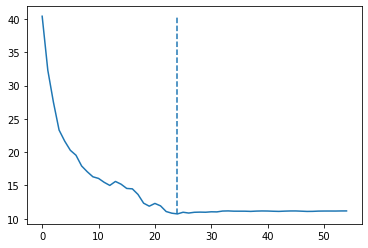

In [96]:
W, Ws, mses, max_gains = m._OMP_2(X[:-1], X[1:], output = True)

x = X[:-1]
y = X[1:]
mses = [[] for i in range(len(Ws))]

for t in range(T - 1):
    print(t, end = "\t")
    x_train = np.delete(x, t, axis = 0)
    y_train = np.delete(y, t, axis = 0)
    
    W, Ws, _ = m._K_OMP_output(x_train, y_train, F = [], normalize = True)
    for j, W in enumerate(Ws):
        mses[j].append(np.linalg.norm(y[t] - x[t] @ W, 2) ** 2)
    

mses_avg = [sum(mse) / len(mse) for mse in mses]
# plt.plot(X)
# plt.show()
plt.vlines(np.argmin(mses_avg), min(mses_avg), max(mses_avg), linestyle = '--')
plt.plot(mses_avg)
h.score(X, m._constrained_OLS(X, Ws[np.argmin(mses_avg)] != 0), W_true);

In [124]:
import matplotlib

matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
    'font.size': 8
})

matplotlib.rcParams['axes.unicode_minus'] = False

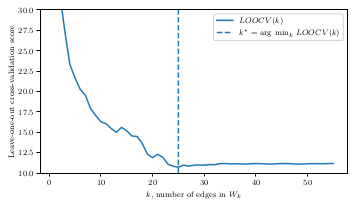

In [125]:
fig = plt.figure(figsize = (5.5, 3))
plt.ylim(10, 30)
plt.vlines(np.argmin(mses_avg) + 1, 10, 30, linestyle = '--', label = "$k^* =$ arg min$_k\ LOOCV(k)$")
plt.ylabel("Leave-one-out cross-validation score")
plt.xlabel(r"$k$, number of edges in $W_k$")
plt.plot(range(1, len(mses_avg) + 1), mses_avg, label = r"$LOOCV(k)$")
plt.legend()
plt.savefig("loocvex.pgf")

0	0	0	0	0	1	1	1	1	1	2	2	2	2	2	3	3	3	3	3	4	4	4	4	4	5	5	5	5	5	6	6	6	6	6	7	7	7	7	7	8	8	8	8	8	9	9	9	9	9	10	10	10	10	10	11	11	11	11	11	12	12	12	12	12	13	13	13	13	13	14	14	14	14	14	15	15	15	15	15	16	16	16	16	16	17	17	17	17	17	18	18	18	18	18	19	19	19	19	19	20	20	20	20	20	21	21	21	21	21	22	22	22	22	22	23	23	23	23	23	24	24	24	24	24	25	25	25	25	25	26	26	26	26	26	27	27	27	27	27	28	28	28	28	28	29	29	29	29	29	30	30	30	30	30	31	31	31	31	31	32	32	32	32	32	33	33	33	33	33	34	34	34	34	34	35	35	35	35	35	36	36	36	36	36	37	37	37	37	37	38	38	38	38	38	39	39	39	39	39	40	40	40	40	40	41	41	41	41	41	42	42	42	42	42	43	43	43	43	43	44	44	44	44	44	45	45	45	45	45	46	46	46	46	46	47	47	47	47	47	48	48	48	48	48	49	49	49	49	49	50	50	50	50	50	51	51	51	51	51	52	52	52	52	52	53	53	53	53	53	54	54	54	54	54	55	55	55	55	55	56	56	56	56	56	57	57	57	57	57	58	58	58	58	58	59	59	59	59	59	60	60	60	60	60	61	61	61	61	61	62	62	62	62	62	63	63	63	63	63	64	64	64	64	64	65	65	65	65	65	66	66	66	66	66	67	67	67	67	67	68	68	68	68	68	69	69	69	69	69	

[216.69701640119595,
 144.13677268390197,
 114.11905913227011,
 90.19502341041208,
 84.29351955663074,
 81.3148492623615,
 78.12310621361361,
 72.61316888441223,
 68.2678120389511,
 64.31837899410388,
 61.72216366879801,
 59.41084607092478,
 58.278036691051405,
 57.05806834752138,
 55.090526107549806,
 52.53151270167045,
 50.21417361811238,
 47.010140377877036,
 43.74735743266678,
 41.354755616051285,
 40.104104788957684,
 38.78802037731402,
 36.935221689579826,
 35.7942757037064,
 34.856652228684226,
 35.268173842426485,
 35.69456043680444,
 35.91751376574354,
 36.14384151623816,
 36.29633336644818,
 36.3670838350893,
 36.43174899087046,
 36.51640530681705,
 36.641711761484295,
 36.704325272033365,
 36.802735802425616,
 36.873812332946486,
 36.92746006911238,
 36.94342660704727,
 36.99036884912235,
 37.06474369011083,
 37.096483396204846,
 37.09382236272559,
 37.08240698441805,
 37.06289431286428,
 37.066318617563745,
 37.068488774568515,
 37.05734027866038,
 37.02393131785326,
 37.02

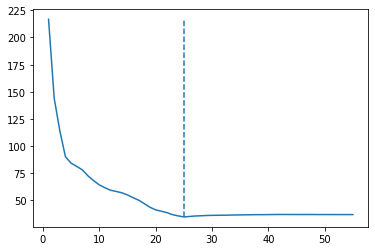

In [33]:
def k_fold_cv(X, fold_size, fold_iters):
    
    # number of timesteps
    T = np.shape(X)[0]
    
    # data set x, y
    x = X[:-1]
    y = X[1:]
    
    # do OMP, get Ws
    W, Ws, _ = m._K_OMP_output(x, y, normalize = True, F = [])
    
    # list for MSE
    mses = [[] for i in range(len(Ws))]

    # number of iterations for the fold
    for i in range(fold_iters):
        print((i * 100) // fold_iters, end = "\t")
        
        # random indices
        idx = np.random.choice(range(T - 1), fold_size, replace = False)
    
        # train set x, y
        x_train = np.delete(x, idx, axis = 0)
        y_train = np.delete(y, idx, axis = 0)
    
        # do OMP
        W, Ws, _ = m._K_OMP_output(x_train, y_train, F = [], normalize = True)

        # compute cross-val-score
        for j, W in enumerate(Ws):
            mses[j].append(np.linalg.norm(y[idx] - x[idx] @ W, 2) ** 2)

    # mse averages
    mses_avg = [sum(mse) / len(mse) for mse in mses]
    
    
    plt.vlines(np.argmin(mses_avg) + 1, min(mses_avg), max(mses_avg), linestyle = '--')
    plt.plot(range(1, len(mses_avg) + 1), mses_avg)
    h.score(X, m._constrained_OLS(X, Ws[np.argmin(mses_avg)] != 0), W_true);
    
    return mses_avg
    
k_fold_cv(X, 10, 500)

In [209]:
def get_Ws(X, samples = 100):
    
    W, _ = m._K_OMP(X[:-1], X[1:], normalize = True, F = [])
    res = center_residuals(get_residuals(X, W))

    W_bootstraps = []

    for i in range(samples):
        print(i, end = ", ")

        # generate data according to W
        X_W = gen_var_noises(W, T, sample_residuals(res, T))

        # bootstrap, get \hat{W}_k
        bootstrap_W_i, _ = m._K_OMP(X_W[:-1], X_W[1:], F = [], normalize = True)
        W_bootstraps.append(bootstrap_W_i)
        
    return np.array(W_bootstraps)

def get_ci(W, W_bootstraps, a = 5):
    p = np.shape(W)[0]
    true_coefs = np.zeros((p, p))
    for i in range(p):
        for j in range(p):
            if not (np.percentile(W_bootstraps[:, i, j], a / 2) <= 0 and np.percentile(W_bootstraps[:, i, j], 100 - a / 2) >= 0):
                true_coefs[i][j] = 1
    return W * true_coefs

print(get_ci(W, get_Ws(X, samples = 100), a = 10))

0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, [[ 0.85218865  0.          0.          0.        ]
 [-0.          0.89932426  0.         -0.00944394]
 [-0.          0.          0.89849686  0.        ]
 [ 0.          0.          0.          0.83315851]]


In [9]:
### Generate Data
np.random.seed(seed = 12345)

# Number of dimensions, number of edges, number of samples
T, p, s = 50, 10, 10
W_true = h.generate_A(p, s, tril = True, low = 0.1, high = 0.50)
for i in range(p):
    W_true[i][i] = 0.9 # np.abs(A_true[i][i])

s = len(W_true.flatten().nonzero()[0])
X = gen_var(W_true, T)

W, Ws, _ = m._K_OMP_output(X[:-1], X[1:], normalize = True, F = []);

In [243]:
h.score(X, get_ci(W, get_Ws(X, samples = 500), a = 10), W_true)

0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 

(0.8, 1.0, 0.0, 0.96, 4, 26.972233253645275, 0.9874748987881258)

0, 0.0	1, 0.0	2, 0.0	3, 0.0	4, 0.0	5, 0.0	6, 0.0	7, 0.0	8, 0.0	9, 0.0	10, 0.1	11, 0.0	12, 0.1	13, 0.1	14, 0.1	15, 0.2	16, 0.2	17, 0.1	18, 0.3	19, 0.1	20, 0.1	21, 0.2	22, 0.1	23, 0.3	24, 0.6	25, 1.7	26, 2.5	27, 3.8	28, 4.5	29, 5.0	30, 5.7	31, 6.7	32, 7.5	33, 8.2	34, 9.2	35, 9.9	36, 11.1	37, 12.2	38, 12.6	39, 12.8	40, 13.5	41, 12.9	42, 14.6	43, 14.1	44, 15.2	45, 15.4	46, 15.8	47, 16.1	48, 16.6	49, 15.9	50, 17.1	51, 17.1	52, 14.4	53, 15.6	54, 13.8	

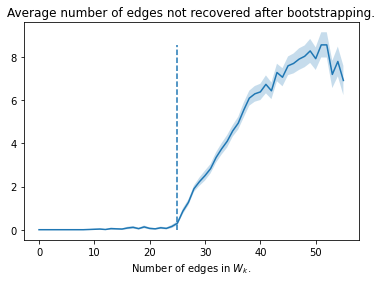

In [22]:
samples = 100
diff_bin_avg, diff_bin_cov = bootstrap_rec(X, samples = samples)

In [28]:
print([(d, i) for d, i in enumerate(diff_bin_avg)])

[(0, 0.0), (1, 0.0), (2, 0.0), (3, 0.0), (4, 0.0), (5, 0.0), (6, 0.0), (7, 0.0), (8, 0.02), (9, 0.04), (10, 0.06), (11, 0.02), (12, 0.1), (13, 0.08), (14, 0.06), (15, 0.16), (16, 0.22), (17, 0.1), (18, 0.26), (19, 0.12), (20, 0.08), (21, 0.18), (22, 0.12), (23, 0.3), (24, 0.6), (25, 1.72), (26, 2.54), (27, 3.8), (28, 4.46), (29, 5.02), (30, 5.66), (31, 6.7), (32, 7.5), (33, 8.2), (34, 9.16), (35, 9.88), (36, 11.1), (37, 12.2), (38, 12.6), (39, 12.78), (40, 13.48), (41, 12.88), (42, 14.58), (43, 14.14), (44, 15.2), (45, 15.42), (46, 15.82), (47, 16.08), (48, 16.58), (49, 15.86), (50, 17.14), (51, 17.14), (52, 14.4), (53, 15.6), (54, 13.84)]


In [33]:
diff_bin_avg[49] = 16.62

In [ ]:
# plt.vlines(s, min(diff_bin_avg), max(diff_bin_avg) / 2, linestyle = '--')
fig = plt.figure(figsize = (5.5, 2.1))
plt.locator_params(axis='y', nbins=6)
plt.xlabel("$k$, number of arcs in $W_k$")
plt.ylabel("average number of arcs missed")
q = np.append(0, diff_bin_avg)
print(diff_bin_avg, q)
plt.plot(range(0, len(q)), np.array(q) / 2)


#for l in np.array(diff_bin_avg).T:
l = np.array([0, 0, 0, 0, 0, 0, 0, 0.1, 0.17, 0.2, 0.16])
plt.fill_between(range(0, len(q)), np.array(q)/2 + l, np.maximum(np.zeros(N+1), np.array(q)/2 - l), alpha = 0.25)
plt.ylim(-0.1, 1.45);
plt.savefig('bootstrap_recovery.pgf', bbox_inches = 'tight')

In [39]:
import matplotlib
matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
    'font.size': 8
})
matplotlib.rcParams['axes.unicode_minus'] = False

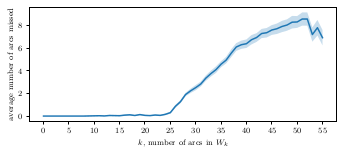

In [42]:
fig = plt.figure(figsize = (5.5, 2.1))
plt.locator_params(axis='y', nbins=6)
plt.locator_params(axis='x', nbins=15)

se = np.sqrt(np.array(diff_bin_cov) / 4) / np.sqrt(samples)
plt.xlabel("$k$, number of arcs in $W_k$")
plt.ylabel("average number of arcs missed")
plt.plot(range(0, len(diff_bin_avg) + 1), np.append(0, np.array(diff_bin_avg)) / 2)
plt.fill_between(range(0, len(diff_bin_avg) + 1), np.append(0, np.array(diff_bin_avg)) / 2 - 1.960 * np.append(0, se), np.append(0, np.array(diff_bin_avg)) / 2 + 1.960 * np.append(0, se), alpha = 0.25)
plt.savefig("bstenreco.pgf", bbox_inches = 'tight')

In [227]:
h.score(X, m._constrained_OLS(X, Ws[21] != 0), W_true);

True Positive Rate: 1.0.
True Negative Rate: 0.975.
False Prediction Rate: 0.091
Accuracy: 0.98.
R-Squared: 0.99
Mean Squared Error: 9.721


In [10]:
h.score(X, m._constrained_OLS(X, m._constrained_lasso(X, W != 0, alpha = 0.08) != 0), W_true);

True Positive Rate: 0.85.
True Negative Rate: 0.938.
False Prediction Rate: 0.227
Accuracy: 0.92.
R-Squared: 0.992
Mean Squared Error: 8.712


0	2	4	6	8	10	12	14	16	18	20	22	24	26	28	30	32	34	36	38	40	42	44	46	48	50	52	54	56	58	60	62	64	66	68	70	72	74	76	78	80	82	84	86	88	90	92	94	96	98	True Positive Rate: 1.0.
True Negative Rate: 1.0.
False Prediction Rate: 0.0
Accuracy: 1.0.
R-Squared: 0.83
Mean Squared Error: 9.395


[42.709254044338756,
 34.60944040108782,
 29.804924091522043,
 26.674247472654717,
 25.705367028981218,
 25.690747220927474,
 22.643461206877348,
 23.230580536638886,
 23.17170273357371,
 21.354708480643495,
 17.12127174920071,
 17.565308584616115,
 17.408737389267525,
 16.400999217994652,
 16.306561959802377,
 15.66801806458566,
 15.495898708748454,
 14.649437712990407,
 13.639607757657114,
 12.93052161143799,
 12.617258628275978,
 11.295548219750204,
 11.111806614712822,
 10.850505636862163,
 10.765788700733843,
 10.778481974097279,
 11.062364469963786,
 11.201835151736205,
 11.34701714420071,
 11.201224849023644,
 11.451250558301526,
 11.617036127707834,
 11.73229738160827,
 11.895158773008674,
 11.859204406386183,
 11.956108880172275,
 11.941162700463725,
 12.046633146343634,
 11.906427192112398,
 11.735664495300853,
 11.600604005920033,
 11.487783989994115,
 11.36680713186695,
 11.268758281182297,
 11.272157816898675,
 11.249740379525473,
 11.288940933440657,
 11.349817915467584,


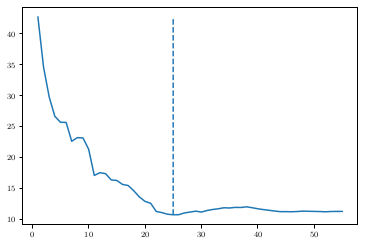

In [81]:
k_fold_cv(X, 1, 50)

### Investigating Constrained LASSO

In [94]:
def get_opt_lambda(X, W, W_true):
    lambdas = np.linspace(0.005, 0.10, 50)
    l_max = np.argmax([h.score(X, m._constrained_lasso(X, W != 0, alpha = l), W_true, printing = False)[3] for l in lambdas])
    return lambdas[l_max], h.score(X, m._constrained_lasso(X, W != 0, alpha = lambdas[l_max]), W_true, printing = False)[3]

def get_bic_lambda(X, W):
    lambdas = np.linspace(0.0001, 0.05, 50)
    l_min = np.argmin([BIC(X, m._constrained_lasso(X, W != 0, alpha = l)) for l in lambdas])
    return lambdas[l_min], BIC(X, m._constrained_lasso(X, W != 0, alpha = lambdas[l_min]))

def get_aic_lambda(X, W):
    lambdas = np.linspace(0.0001, 0.05, 50)
    l_min = np.argmin([AIC(X, m._constrained_lasso(X, W != 0, alpha = l)) for l in lambdas])
    return lambdas[l_min], AIC(X, m._constrained_lasso(X, W != 0, alpha = lambdas[l_min]))

def BIC(X, W):
    return np.linalg.norm(X[1:] - X[:-1] @ W, 'f') ** 2 + np.linalg.norm(W.flatten(), 0) * np.log(T)

def AIC(X, W):
    return np.linalg.norm(X[1:] - X[:-1] @ W, 'f') ** 2 + np.linalg.norm(W.flatten(), 0) * 2

# lambdas = np.linspace(0.0001, 0.05, 50)
# for lamb in lambdas:
#     print(round(BIC(X, m._constrained_lasso(X, W != 0, alpha = lamb)), 0), round(lamb, 3))

print(get_opt_lambda(X, W, W_true))
print(get_bic_lambda(X, W))
print(get_aic_lambda(X, W))

(0.034081632653061224, 0.97)
(0.009265306122448979, 5166.276141075036)
(0.0011183673469387756, 4975.740009248283)


In [91]:
### Generate Data
np.random.seed(seed = 12345)

# Number of dimensions, number of edges, number of samples
T, p, s = 500, 10, 20
W_true = h.generate_A(p, s, tril = True, low = 0.45, high = 0.50)
for i in range(p):
    W_true[i][i] = 0.7 # np.abs(A_true[i][i])

s = len(W_true.flatten().nonzero()[0])
X = gen_var(W_true, T)

W, Ws, _ = m._K_OMP_output(X[:-1], X[1:], normalize = True, F = []);

print(get_opt_lambda(X, W, W_true))
h.score(X, m._constrained_OLS(X, m._constrained_lasso(X, W != 0, alpha = 0.050) != 0), W_true)
h.score(X, m._constrained_OLS(X, m._constrained_lasso(X, W != 0, alpha = 0.1) != 0), W_true)
print()
h.score(X, m._constrained_OLS(X, m._constrained_lasso(X, W != 0, alpha = 0.150) != 0), W_true)
print()
h.score(X, m._constrained_OLS(X, m._constrained_lasso(X, W != 0, alpha = 0.2) != 0), W_true)
print()
h.score(X, m._constrained_OLS(X, m._constrained_lasso(X, W != 0, alpha = 0.250) != 0), W_true)
print()
h.score(X, m._constrained_OLS(X, Ws[s-1] != 0), W_true);

(0.034081632653061224, 0.97)
True Positive Rate: 1.0.
True Negative Rate: 0.957.
False Prediction Rate: 0.091
Accuracy: 0.97.
R-Squared: 0.98
Mean Squared Error: 9.82
True Positive Rate: 0.7.
True Negative Rate: 0.971.
False Prediction Rate: 0.087
Accuracy: 0.89.
R-Squared: 0.974
Mean Squared Error: 12.944

True Positive Rate: 0.6.
True Negative Rate: 0.986.
False Prediction Rate: 0.053
Accuracy: 0.87.
R-Squared: 0.97
Mean Squared Error: 15.089

True Positive Rate: 0.6.
True Negative Rate: 0.986.
False Prediction Rate: 0.053
Accuracy: 0.87.
R-Squared: 0.97
Mean Squared Error: 15.089

True Positive Rate: 0.5.
True Negative Rate: 0.986.
False Prediction Rate: 0.062
Accuracy: 0.84.
R-Squared: 0.965
Mean Squared Error: 17.568

True Positive Rate: 0.967.
True Negative Rate: 0.986.
False Prediction Rate: 0.033
Accuracy: 0.98.
R-Squared: 0.979
Mean Squared Error: 10.719
